# Guided Capstone Step 2 Data Wrangling


This is the second step in the Data Science Method. We introduced this topic in the last subunit. With a clear problem identification completed we can progress on to the second step of Data Wrangling, this consists of multiple components including; Data Collection, Data Organization, Data Definitions, and Data Cleaning.  



**The Data Science Method**  


1.   Problem Identification 

2.   **Data Wrangling** 
  * Data Collection
      - Locating the data
      - Data loading
      - Data joining
   * Data Organization
      -  File structure
      -  Git & Github
  * Data Definition
      - Column names
      - Data types (numeric, categorical, timestamp, etc.)
      - Description of the columns
      - Count or percent per unique values or codes (including NA)
      - The range of values or codes  
  * Data Cleaning
      - NA or missing data
      - Duplicates
 
3.   Exploratory Data Analysis 

4.   Pre-processing and Training Data Development

5.   Modeling 

6.   Documentation





## Data Collection

First we load the needed packages and modules into python. Then we will load the data into a pandas data frame for ease of use. Run the cell below to get started.

In [5]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Now, we need to prepare to load the csv file of our data. You may need to change your path to the location where you saved the csv file on your local machine or you need to save both the csv and the notebook to your working project directory. 
Start by printing the current directory.

**<font color='teal'> Print the current working directory </font>**

In [6]:
#https://docs.python.org/3/library/os.html
print(os.getcwd())

/Users/justin/Desktop/GuidedCapstone-master-2/notebooks


**<font color='teal'> Print the files in your current directory to make sure the 'updated_ski_data.csv' is present. </font>**

In [7]:
files = [f for f in os.listdir('.') if os.path.isfile(f)]
for f in files:
    print(f)

GuidedCapstoneStep3-AnswerKey.ipynb
GuidedCapstoneStep4-AnswerKey.ipynb
GuidedCapstoneStep5-AnswerKey.ipynb
GuidedCapstoneStep2-AnswerKey.ipynb
AnnotatedBoxplot.png
GuidedCapstoneStep5.ipynb
GuidedCapstoneStep3.ipynb
GuidedCapstoneStep6.ipynb
GuidedCapstoneStep4.ipynb
GuidedCapstoneStep6-AnswerKey.ipynb
GuidedCapstoneStep2.ipynb


<font color='teal'> **If you need to change your working directory by defining the path in the next cell.~ make sure to uncomment the code before running the cell, if your path is fine just go on to the Load the data step.**</font>

In [7]:
path="/Users/justin/Desktop/GuidedCapstone-master-2/data"
os.chdir(path) 

#### Should probably make it a good habit to check if the directory changed 

In [8]:
files = [f for f in os.listdir('.') if os.path.isfile(f)]
for f in files:
    print(f)

updated_ski_data.csv
.DS_Store
step2_output.csv
step3_output.csv


### Load data from csv file
Now we are ready to read our data into a pandas dataframe. In this exercise this will complete the data collection step as all the data we need for our project are contained in this one csv file.
*Double check your path is correct, and between the `file` name and the `path` you have the full location of your `updated_ski_data.csv`

<font color='teal'> **Load the data into a pandas dataframe and print the first five rows of the dataframe.**</font>

In [46]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html
data = pd.read_csv('updated_ski_data.csv')
print(data.head())


                  Name   Region    state  summit_elev  vertical_drop  \
0       Alyeska Resort   Alaska   Alaska         3939           2500   
1  Eaglecrest Ski Area   Alaska   Alaska         2600           1540   
2     Hilltop Ski Area   Alaska   Alaska         2090            294   
3     Arizona Snowbowl  Arizona  Arizona        11500           2300   
4  Sunrise Park Resort  Arizona  Arizona        11100           1800   

   base_elev  trams  fastEight  fastSixes  fastQuads  ...  LongestRun_mi  \
0        250      1        0.0          0          2  ...            1.0   
1       1200      0        0.0          0          0  ...            2.0   
2       1796      0        0.0          0          0  ...            1.0   
3       9200      0        0.0          1          0  ...            2.0   
4       9200      0        NaN          0          1  ...            1.2   

   SkiableTerrain_ac  Snow Making_ac  daysOpenLastYear  yearsOpen  \
0             1610.0           113.0     

## Data Organization

Data organization in this project is going to be completed through a basic project folder structure we create. As you read in the Medium article introducing the data wrangling step often this is completed using Github or a module such as cookiecutter. Now that we have our data and our notebook pointed our working project directory let's start by printing the current file location, then we will create a few subfolders to keep our project organized.

<font color='teal'> **Finish the statement below by assigning the path variable.**</font>

In [14]:
path = "/Users/justin/Desktop/GuidedCapstone-master-2/data"

In [15]:
print ("The current working directory is %s" % path)

The current working directory is /Users/justin/Desktop/GuidedCapstone-master-2/data


### Create subfolders in project directory

Now, let's create some subfolders inside our Project folder.

<font color='teal'> **Create a subfolder called `data`.**</font>

In [17]:
os.mkdir('data')

<font color='teal'> **Create a folder for the data visualizations you will create in future steps called `figures`.**</font>

In [20]:
os.mkdir('figures')

<font color='teal'> **Create a folder for the models you save, called `models`.**</font>

In [22]:
os.mkdir('models')

<font color='teal'> **Print the contents of your project folder to confirm you created the additional folders in your directory.**</font>

In [23]:
#Check if data folder is there 
print(os.listdir())

['updated_ski_data.csv', '.DS_Store', 'step2_output.csv', 'models', 'figures', 'data', 'step3_output.csv']


## Data Definition
Review Column Names, Data Types, and null values.

### Column Names 
<font color='teal'> **Print the columns names of the entire dataframe**</font>

In [25]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html
print(data.columns)

Index(['Name', 'Region', 'state', 'summit_elev', 'vertical_drop', 'base_elev',
       'trams', 'fastEight', 'fastSixes', 'fastQuads', 'quad', 'triple',
       'double', 'surface', 'total_chairs', 'Runs', 'TerrainParks',
       'LongestRun_mi', 'SkiableTerrain_ac', 'Snow Making_ac',
       'daysOpenLastYear', 'yearsOpen', 'averageSnowfall', 'AdultWeekday',
       'AdultWeekend', 'projectedDaysOpen', 'NightSkiing_ac'],
      dtype='object')


In [88]:
#Need to talk about the Shape
#so we have 330 rows and 27 features 
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html
print(data.shape)


(330, 27)


### Data Types 
Review which columns are integer, float, categorical, or dates. Make sure the data type loaded properly in the dataframe. 

<font color='teal'> **Using the `df.dtypes` function print the variable names and associated datatypes.**</font>

In [27]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html
print(data.dtypes)

Name                  object
Region                object
state                 object
summit_elev            int64
vertical_drop          int64
base_elev              int64
trams                  int64
fastEight            float64
fastSixes              int64
fastQuads              int64
quad                   int64
triple                 int64
double                 int64
surface                int64
total_chairs           int64
Runs                 float64
TerrainParks         float64
LongestRun_mi        float64
SkiableTerrain_ac    float64
Snow Making_ac       float64
daysOpenLastYear     float64
yearsOpen            float64
averageSnowfall      float64
AdultWeekday         float64
AdultWeekend         float64
projectedDaysOpen    float64
NightSkiing_ac       float64
dtype: object


<font color='teal'> **The `df.info()` function also prints the count of non-null values per column. Use this function to review the column names, null value counts and data types of your data frame.**</font>

In [31]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html
print(data.info())
#Much easier to do 
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 27 columns):
Name                 330 non-null object
Region               330 non-null object
state                330 non-null object
summit_elev          330 non-null int64
vertical_drop        330 non-null int64
base_elev            330 non-null int64
trams                330 non-null int64
fastEight            164 non-null float64
fastSixes            330 non-null int64
fastQuads            330 non-null int64
quad                 330 non-null int64
triple               330 non-null int64
double               330 non-null int64
surface              330 non-null int64
total_chairs         330 non-null int64
Runs                 326 non-null float64
TerrainParks         279 non-null float64
LongestRun_mi        325 non-null float64
SkiableTerrain_ac    327 non-null float64
Snow Making_ac       284 non-null float64
daysOpenLastYear     279 non-null float64
yearsOpen            329 non-null floa

Some of these column names are easy to understand but others are not as clear. We have a metadata file with information about each column to help us understand what the column names refer to. Let's review the metadata table below for more information about each column.

Descriptions of Columns

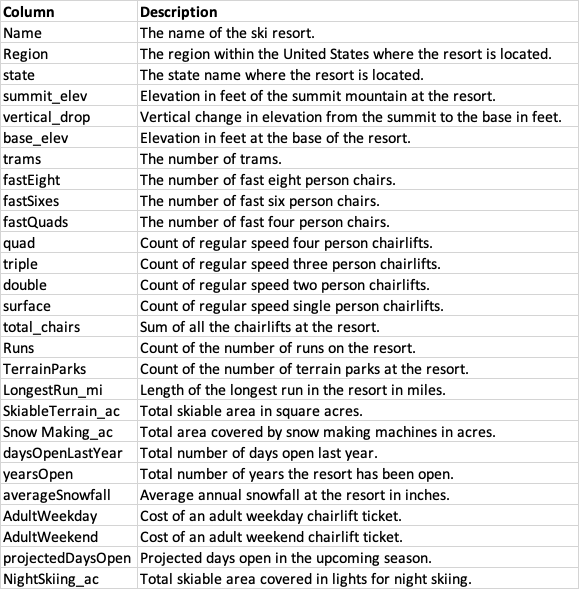

There are some null or missing values we will need to mitgate in a later step. However, let's also look at the counts of unique values or codes per column first.

### Count of unique values or codes
<font color='teal'> **Print the count of unique values for every column regardless of data type.**</font>

In [35]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html
print(data.nunique())

Name                 329
Region                38
state                 35
summit_elev          266
vertical_drop        193
base_elev            244
trams                  5
fastEight              2
fastSixes              7
fastQuads             14
quad                   7
triple                 9
double                10
surface               12
total_chairs          31
Runs                 110
TerrainParks          11
LongestRun_mi         42
SkiableTerrain_ac    193
Snow Making_ac       143
daysOpenLastYear     111
yearsOpen             72
averageSnowfall      107
AdultWeekday          83
AdultWeekend          81
projectedDaysOpen     90
NightSkiing_ac        78
dtype: int64


<font color='teal'> **Print the percent of unique values per column.Use the `df.nunique` and the size of the dataframe to calculate the percentages.**</font>

In [39]:
print(data.nunique()/len(data))

Name                 0.996970
Region               0.115152
state                0.106061
summit_elev          0.806061
vertical_drop        0.584848
base_elev            0.739394
trams                0.015152
fastEight            0.006061
fastSixes            0.021212
fastQuads            0.042424
quad                 0.021212
triple               0.027273
double               0.030303
surface              0.036364
total_chairs         0.093939
Runs                 0.333333
TerrainParks         0.033333
LongestRun_mi        0.127273
SkiableTerrain_ac    0.584848
Snow Making_ac       0.433333
daysOpenLastYear     0.336364
yearsOpen            0.218182
averageSnowfall      0.324242
AdultWeekday         0.251515
AdultWeekend         0.245455
projectedDaysOpen    0.272727
NightSkiing_ac       0.236364
dtype: float64


For categorical columns it is much more helpful to know what the unique codes are. <font color='teal'> **For example, if we look at the `Region` or `state` column, let's print out the different states in the data frame.**</font>

In [46]:
print(data.Region.unique())
print('\n')
print(data.Region.value_counts())
print('\n')
print(data.state.unique())
print('\n')
print(data.state.value_counts())

['Alaska' 'Arizona' 'Northern California' 'Sierra Nevada' 'Colorado'
 'Connecticut' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Maine' 'Maryland'
 'Massachusetts' 'Michigan' 'Minnesota' 'Missouri' 'Montana' 'Nevada'
 'New Hampshire' 'New Jersey' 'New Mexico' 'New York' 'North Carolina'
 'Ohio' 'Oregon' 'Mt. Hood' 'Pennsylvania' 'Rhode Island' 'South Dakota'
 'Tennessee' 'Salt Lake City' 'Utah' 'Vermont' 'Virginia' 'Washington'
 'West Virginia' 'Wisconsin' 'Wyoming']


New York               33
Michigan               29
Sierra Nevada          22
Colorado               22
Pennsylvania           19
New Hampshire          16
Wisconsin              16
Vermont                15
Minnesota              14
Montana                12
Idaho                  12
Massachusetts          11
Washington             10
New Mexico              9
Maine                   9
Wyoming                 8
Utah                    7
North Carolina          6
Oregon                  6
Salt Lake City          6
Connecticut   

### Range of values per column

<font color='teal'>**Print the range of values using the aggregate function.**</font>

In [51]:
#This step is not clear at all should ask for the min and max 
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html
#https://numpy.org/doc/stable/reference/generated/numpy.ndarray.T.html
data.agg([min, max]).T

,min,max
Name,49 Degrees North,Yosemite Ski & Snowboard Area
Region,Alaska,Wyoming
state,Alaska,Wyoming
summit_elev,315,13487
vertical_drop,60,4425
base_elev,70,10800
trams,0,4
fastEight,0,1
fastSixes,0,6
fastQuads,0,15


<font color='teal'> **Review the numeric data sets summary statistics.**</font>

In [49]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html
data.describe().T

,count,mean,std,min,25%,50%,75%,max
summit_elev,330.0,4591.818182,3735.535934,315.0,1403.75,3127.5,7806.00,13487.0
vertical_drop,330.0,1215.427273,947.864557,60.0,461.25,964.5,1800.00,4425.0
base_elev,330.0,3374.000000,3117.121621,70.0,869.00,1561.5,6325.25,10800.0
trams,330.0,0.172727,0.559946,0.0,0.00,0.0,0.00,4.0
fastEight,164.0,0.006098,0.078087,0.0,0.00,0.0,0.00,1.0
fastSixes,330.0,0.184848,0.651685,0.0,0.00,0.0,0.00,6.0
fastQuads,330.0,1.018182,2.198294,0.0,0.00,0.0,1.00,15.0
quad,330.0,0.933333,1.312245,0.0,0.00,0.0,1.00,8.0
triple,330.0,1.500000,1.619130,0.0,0.00,1.0,2.00,8.0
double,330.0,1.833333,1.815028,0.0,1.00,1.0,3.00,14.0


## Data Cleaning

In [78]:
#Should also have students check the version of pandas
print(pd.__version__)

0.25.3


In [ ]:
#Even put in the pandas org cheat sheet here would be helpful
#https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

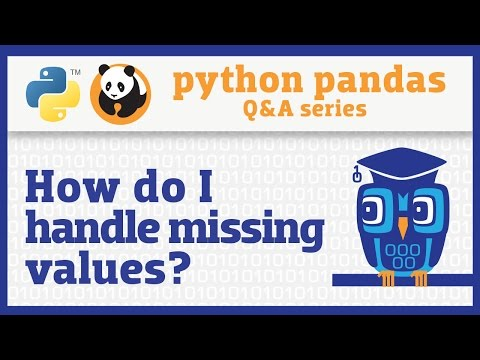

In [40]:
#Maybe put a video tutorial here 
from IPython.display import YouTubeVideo
YouTubeVideo('fCMrO_VzeL8')

### Handle the missing and NA values
Run the code below to print out the percent of each feature that is missing. You can see from the result of the code that, there are 13 columns out of 27 missing data. Although, most of these are missing less than 10% of the data. You may need to adapt the code if your dataframe is named something other than df.


*   Consider the columns individually 
*   Identify the appropriate fill method for each column



In [105]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.any.html
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.tolist.html
data.columns[data.isnull().any()].tolist()

['fastEight',
 'Runs',
 'TerrainParks',
 'LongestRun_mi',
 'SkiableTerrain_ac',
 'Snow Making_ac',
 'daysOpenLastYear',
 'yearsOpen',
 'averageSnowfall',
 'AdultWeekday',
 'AdultWeekend',
 'projectedDaysOpen',
 'NightSkiing_ac']

In [120]:
#Describe again
data[missingColumns].describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 13 columns):
fastEight            164 non-null float64
Runs                 326 non-null float64
TerrainParks         279 non-null float64
LongestRun_mi        325 non-null float64
SkiableTerrain_ac    327 non-null float64
Snow Making_ac       284 non-null float64
daysOpenLastYear     279 non-null float64
yearsOpen            329 non-null float64
averageSnowfall      316 non-null float64
AdultWeekday         276 non-null float64
AdultWeekend         279 non-null float64
projectedDaysOpen    283 non-null float64
NightSkiing_ac       187 non-null float64
dtypes: float64(13)
memory usage: 33.6 KB


In [121]:
#Look at info again
data[missingColumns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 13 columns):
fastEight            164 non-null float64
Runs                 326 non-null float64
TerrainParks         279 non-null float64
LongestRun_mi        325 non-null float64
SkiableTerrain_ac    327 non-null float64
Snow Making_ac       284 non-null float64
daysOpenLastYear     279 non-null float64
yearsOpen            329 non-null float64
averageSnowfall      316 non-null float64
AdultWeekday         276 non-null float64
AdultWeekend         279 non-null float64
projectedDaysOpen    283 non-null float64
NightSkiing_ac       187 non-null float64
dtypes: float64(13)
memory usage: 33.6 KB


A fast way to get an idea of the distribution of each attribute is to look at histograms. Histograms group data into bins and provide you a count of the number of observations in each bin. 

From the shape of the bins you can quickly get a feeling for whether an attribute is Gaussian, skewed or even has an exponential distribution. It can also help you see possible outliers.

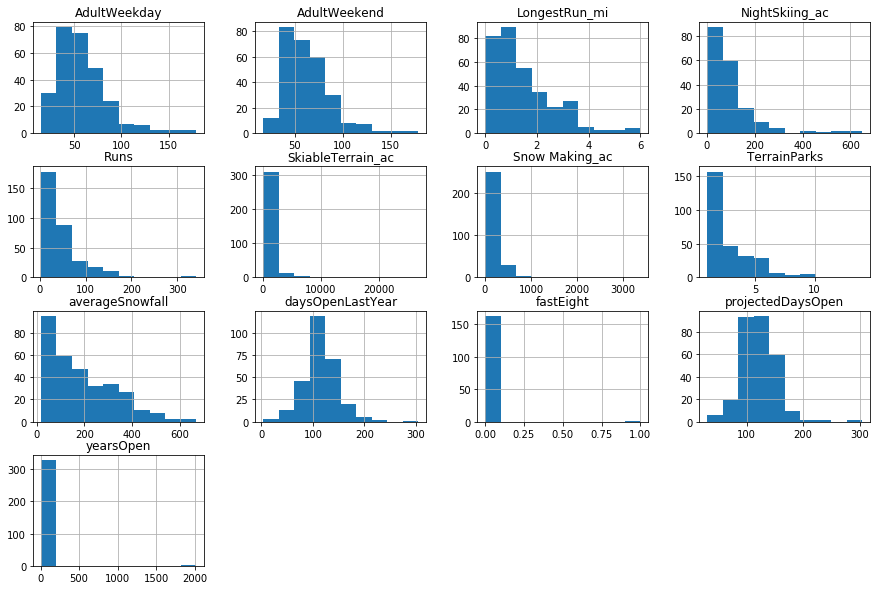

In [106]:
missingColumns = data.columns[data.isnull().any()].tolist()
plt.rcParams['figure.figsize'] = [15, 10]
data[missingColumns].hist()
plt.show()

Another useful way to review the distribution of each attribute is to use Box and Whisker Plots or boxplots for short. 

Boxplots summarize the distribution of each attribute, drawing a line for the median (middle value) and a box around the 25th and 75th percentiles (the middle 50% of the data). 

The whiskers give an idea of the spread of the data and dots outside of the whiskers show candidate outlier values (values that are 1.5 times greater than the size of spread of the middle 50% of the data

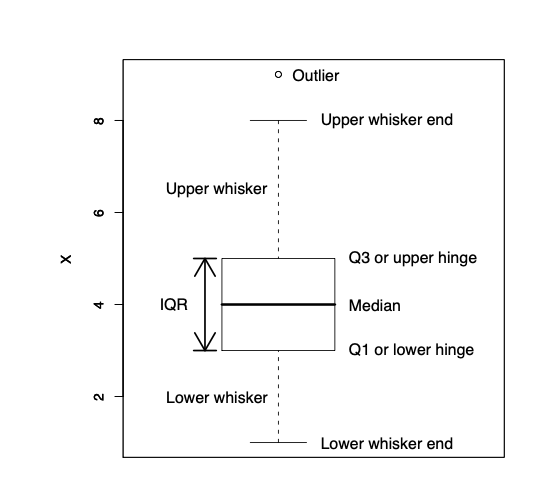

In [146]:
from IPython.display import Image
Image(filename='AnnotatedBoxplot.png') 

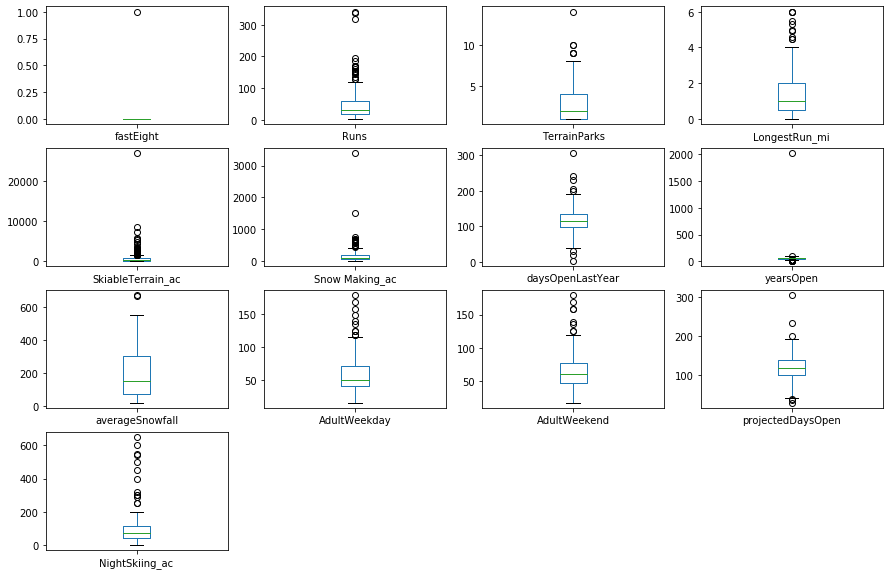

In [109]:
data[missingColumns].plot(kind='box', subplots=True, layout=(4,4), sharex=False, 
          sharey=False) 
plt.show()

In [52]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html
#https://docs.python.org/3/library/functions.html
nas=pd.DataFrame(data.isnull().sum().sort_values(ascending=False)/len(data),
                 columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent
fastEight,0.503030
NightSkiing_ac,0.433333
AdultWeekday,0.163636
AdultWeekend,0.154545
daysOpenLastYear,0.154545
TerrainParks,0.154545
projectedDaysOpen,0.142424
Snow Making_ac,0.139394
averageSnowfall,0.042424
LongestRun_mi,0.015152


Let's review what each of these columns in the data are.


*   fastEight is the number of fast eight person ski lifts at each of the resorts. In addition we have the counts of all the other types of chairs at each resort and the total number of chairs as well. 

*   We can simply subtract the number of fastEight lifts from the total to determine if any of these missing values can be backfilled or should be equal to zero. Follow the next step below and see for yourself how to review and backfill these missing values.These columns contain all the resort lift counts by type.


* trams	
* fastEight	
* fastSixes	
* fastQuads	
* quad
* triple	
* double	
* surface	
* total_chairs <- the sum of these columns for each row.




<font color='teal'> **In order to determine what an appropriate fill value for the fastEight column, we need to calculate the difference between the sum of all the chairlift columns and the `total_chairs` column.**</font>

In [123]:
print(data[data['fastEight'] == 1])

print('\n')
print('\n')

print(data[data['fastEight'] == 0])

               Name   Region    state  summit_elev  vertical_drop  base_elev  \
140  Big Sky Resort  Montana  Montana        11166           4350       7500   

     trams  fastEight  fastSixes  fastQuads  ...  LongestRun_mi  \
140      1        1.0          2          5  ...            6.0   

     SkiableTerrain_ac  Snow Making_ac  daysOpenLastYear  yearsOpen  \
140             5800.0           400.0             144.0       46.0   

     averageSnowfall  AdultWeekday  AdultWeekend  projectedDaysOpen  \
140            400.0           NaN           NaN              144.0   

     NightSkiing_ac  
140             NaN  

[1 rows x 27 columns]




                                  Name               Region       state  \
0                       Alyeska Resort               Alaska      Alaska   
1                  Eaglecrest Ski Area               Alaska      Alaska   
2                     Hilltop Ski Area               Alaska      Alaska   
3                     Arizona Snowbowl         

In [87]:
#Should state that luckily there are no NaN values for the other types of Chair lifts
print(data.shape)
total = data[['trams', 'fastEight', 'fastSixes', 'fastQuads',
        'quad', 'triple', 'double', 'surface']].sum(axis = 1)
total2 = data.total_chairs
difference = total - total2
difference.value_counts()

(330, 27)


0.0    330
dtype: int64

In [18]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html
data.columns
sum_change = data[['trams', 'fastEight', 'fastSixes', 'fastQuads',
        'quad', 'triple', 'double', 'surface']].sum(axis = 1) -data.total_chairs  
sum_change.value_counts()

0.0    330
dtype: int64

As you can see from running the above cell there are no fastEight lifts values missing because the difference between the sum of all the lift columns and the 'total_chairs' column is zero for every row in the dataframe. This confirms that we can therefore replace the missing values for the fastEight rows with zeros.

<font color='teal'> **In the cell below to replace Nan's in 'fastEight' with zero.**</font>

In [128]:
#Should say to make a copy here 
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html
df = data.copy()

In [130]:
df['fastEight'] = df['fastEight'].replace(np.nan,0)
df['fastEight'].isnull().sum()

0

Now, let us consider the next column with missing values 'NightSkiing_ac', this column is the number of acres of night skiing availble at the given resort. Not all resorts have night skiing because it requires stadium lights and is not that popular with skiers and snowboarders.

Given that information it is also safe to assume that if there are missing values in this column it is due to their not being any night skiing acres available at that resort so we can fill missing values with zeros safely. 

In [132]:
#just replace it was 0? 
df['NightSkiing_ac'] = df['NightSkiing_ac'].replace(np.nan,0)
df['NightSkiing_ac'].isnull().sum()

0

Next, let's consider the ticket price columns 'AdultWeekday' & 'AdultWeekend' we know there has to be a price for these that happens to missing so in this case we can not fill the missing values with zeros. 

Instead we have a few options about what value we use to fill the missing rows. We can simply take the mean of the column in consideration or we could backfill or forwardfill from the resort in the row before or after our missing value. 

Backfill and forward fill would be more reasonable in a situation where the data are in a particular order where the rows near each other are similar to each other in the price column. 

We could also build an imputation model to use a model to predict the value based on the data values in adjacent columns as well as adjacent rows. 

<font color='teal'> **Run the cell below to replace Nan's in 'AdultWeekday' with the mean value.**</font>

In [133]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html
df['AdultWeekday'].fillna((df['AdultWeekday'].mean()), inplace=True)

<font color='teal'> **Use what you know about the remaining columns missing data and decide whether to fill with a zero or to fill with a mean.**</font>


In [135]:
newMissingColumns = df.columns[df.isnull().any()].tolist()
newMissingColumns

['Runs',
 'TerrainParks',
 'LongestRun_mi',
 'SkiableTerrain_ac',
 'Snow Making_ac',
 'daysOpenLastYear',
 'yearsOpen',
 'averageSnowfall',
 'AdultWeekend',
 'projectedDaysOpen']

In [136]:
#https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.hist.html
#https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.boxplot.html

In [140]:
df[newMissingColumns].describe().T

,count,mean,std,min,25%,50%,75%,max
Runs,326.0,48.214724,46.364077,3.0,19.0,33.0,60.0,341.0
TerrainParks,279.0,2.820789,2.008113,1.0,1.0,2.0,4.0,14.0
LongestRun_mi,325.0,1.433231,1.156171,0.0,0.5,1.0,2.0,6.0
SkiableTerrain_ac,327.0,739.801223,1816.167441,8.0,85.0,200.0,690.0,26819.0
Snow Making_ac,284.0,174.873239,261.336125,2.0,50.0,100.0,200.5,3379.0
daysOpenLastYear,279.0,115.103943,35.063251,3.0,97.0,114.0,135.0,305.0
yearsOpen,329.0,63.656535,109.429928,6.0,50.0,58.0,69.0,2019.0
averageSnowfall,316.0,185.316456,136.356842,18.0,69.0,150.0,300.0,669.0
AdultWeekend,279.0,64.166810,24.554584,17.0,47.0,60.0,77.5,179.0
projectedDaysOpen,283.0,120.053004,31.045963,30.0,100.0,120.0,139.5,305.0


### Look for duplicate rows
Run the code below to print out the duplicated rows.You can see there are no duplicate rows, so in this particular case there is nothing else to do related to duplicate rows. We will review duplicate or synonymous columns in Step 3 of the Guided Capstone.

In [76]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html
duplicateRowsDF = data[data.duplicated()]
duplicateRowsDF

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac


## Export data to a new csv file 
In order to bring the changes we made here into the next notebook we are going to write out the updated data frame to a new csv file.

<font color='teal'> **Export the processed dataframe as a csv file to the data folder we created earlier. Name this new csv file `step2_output.csv`.**</font>

In [124]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html
print(os.getcwd())
data.to_csv('step2_output.csv', index = False)

/Users/justin/Desktop/GuidedCapstone-master-2/Data


The data transformations created in this step of the DSM are all generally steps to be applied to any data science project. 

However, the decisions we made about how to handle the missing and NA data are specific to the problem at hand. 

In the next step of the DSM and the next Guided Capstone Notebook you will see how all these steps prepare the data for exploratory data analysis.